<a href="https://colab.research.google.com/github/kunalkishanmehta/ns-struc-dm/blob/master/Copy_of_Constrain_DM_NS_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### CONSTRAIN_DM_NS_MODELS.IPYNB -- Compare neutron star mass-radius relations with different DM fractions to observed mass-radius measurements

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
import numpy.random

In [2]:
# # download the ns-struc-dm repository

# ! git clone https://github.com/kunalkishanmehta/ns-struc-dm.git`

In [ ]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/kunalkishanmehta/ns-struc-dm.git # download code repository from https://github.com/landryp/ns-struc/tree/enthalpy
python2 -m pip install scipy

mkdir /opt/bin /opt/lib/ /opt/lib/python2.7 /opt/lib/python2.7/site-packages # create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
python2 setup.py install --prefix /opt/

echo -e '\n *** \n'

getnsprops -h # this is the executable from ns-struc that solves the TOV equations to compute neutron star observables; print its help string to see the syntax for calling it

echo -e '\n *** \n'

In [ ]:
%%bash
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
git pull
python2 setup.py install --prefix /opt/



In [6]:
import zipfile
# with zipfile.ZipFile('/content/ns-struc-dm/file/sly.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content')

with zipfile.ZipFile('/content/ns-struc-dm/file/stable_m_r_sly.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

with zipfile.ZipFile('/content/ns-struc-dm/file/stable_m_r_mpa1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

with zipfile.ZipFile('/content/ns-struc-dm/file/stable_m_r_hqc18.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# with zipfile.ZipFile('/content/ns-struc-dm/file/mpa1.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content')

In [7]:
stable_m_r_sly = []
stable_m_r_mpa1 = []
stable_m_r_hqc18 = []
for i in range(9):
  stable_m_r_sly.append(np.genfromtxt('/content/stable_m_r_sly_{}.csv'.format(i),delimiter=',',names=True,dtype=None))
  stable_m_r_mpa1.append(np.genfromtxt('/content/stable_m_r_mpa1_{}.csv'.format(i),delimiter=',',names=True,dtype=None))
  stable_m_r_hqc18.append(np.genfromtxt('/content/stable_m_r_hqc18_{}.csv'.format(i),delimiter=',',names=True,dtype=None))


In [8]:

# data_con_mpa10 = np.genfromtxt('/content/macro_contour0mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa11 = np.genfromtxt('/content/macro_contour1mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa12 = np.genfromtxt('/content/macro_contour2mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa13 = np.genfromtxt('/content/macro_contour3mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa14 = np.genfromtxt('/content/macro_contour4mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa15 = np.genfromtxt('/content/macro_contour5mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa16 = np.genfromtxt('/content/macro_contour6mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa17 = np.genfromtxt('/content/macro_contour7mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa18 = np.genfromtxt('/content/macro_contour8mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa19 = np.genfromtxt('/content/macro_contour9mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa110 = np.genfromtxt('/content/macro_contour10mpa1.csv',delimiter=',',names=True,dtype=None)

In [9]:
# load neutron star observations

j0030 = np.genfromtxt('ns-struc-dm/etc/Miller_J0030_three-spot.csv',names=True,delimiter=',',dtype=None) # psr j0030 mass and radius
j0740 = np.genfromtxt('ns-struc-dm/etc/Miller_J0740_nominal-XMM.csv',names=True,delimiter=',',dtype=None) # psr j0740 mass and radius

gw170817 = np.genfromtxt('ns-struc-dm/etc/LVC_GW170817_PhenomPNRT-lo.csv',names=True,delimiter=',',dtype=None) # gw170817 masses and tidal deformabilities
gw190425 = np.genfromtxt('ns-struc-dm/etc/LVC_GW190425_PhenomPNRT-hi.csv',names=True,delimiter=',',dtype=None) # gw190425 masses and tidal deformabilities

In [10]:
# convert tidal deformability to radius using a fit based on many different equations of state

c = 2.998e10 # speed of light
G = 6.6743e-9 # Newton's constant
Msun = 1.988435e33 # solar mass

def C(L): # fit to compactness Gm/c^2 R in terms of tidal deformability from arxiv:1608.02582

  return 0.360 - 0.0355*np.log(L) + 0.001056*np.log(L)**2

R1_gw170817 = [1e-4*(G/c**2)*m1*Msun/C(L1) for m1,L1 in zip(gw170817['m1'],gw170817['Lambda1'])]
R2_gw170817 = [1e-4*(G/c**2)*m2*Msun/C(L2) for m2,L2 in zip(gw170817['m2'],gw170817['Lambda2'])]

R1_gw190425 = [1e-4*(G/c**2)*m1*Msun/C(L1) for m1,L1 in zip(gw190425['m1'],gw190425['Lambda1'])]
R2_gw190425 = [1e-4*(G/c**2)*m2*Msun/C(L2) for m2,L2 in zip(gw190425['m2'],gw190425['Lambda2'])]

In [11]:
# load mass-radius tables for neutron stars containing dark matter

sly_dm = np.genfromtxt('ns-struc-dm/file/macro-sly.csv',names=True,delimiter=',',dtype=None) # sly equation of state
mpa1_dm = np.genfromtxt('ns-struc-dm/file/macro-mpa1.csv',names=True,delimiter=',',dtype=None) # mpa1 equation of state
hqc18_dm = np.genfromtxt('ns-struc-dm/file/macro-hqc18.csv',names=True,delimiter=',',dtype=None) # hqc18 equation of state

In [12]:
data_colours = ['b','orange','y','c','m','indigo','pink','lime','brown']
data_frac = [10,20,30,40,50,60,70,80,90]

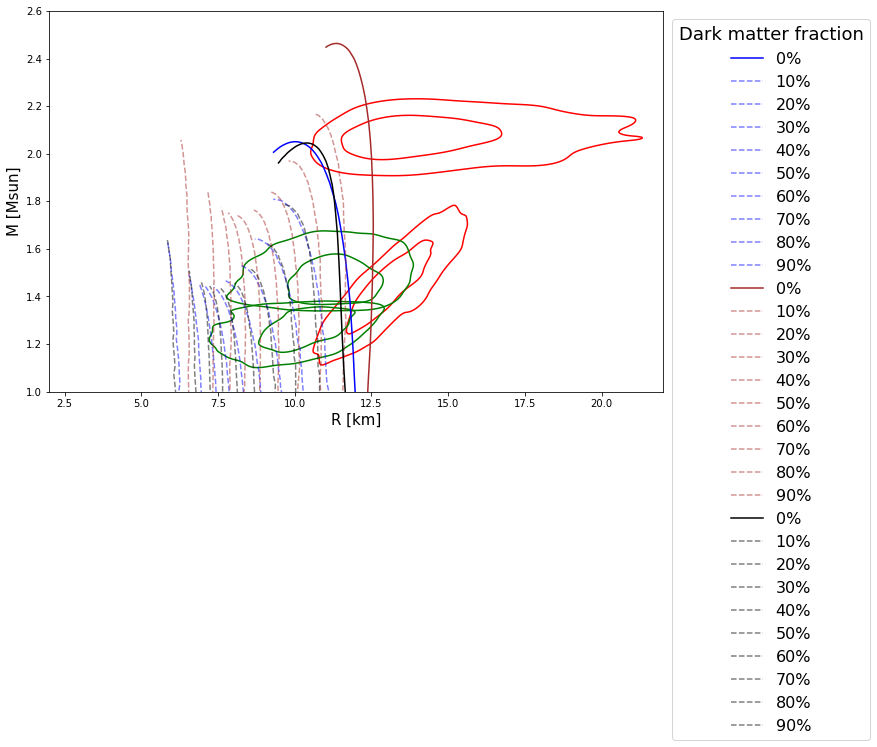

In [13]:
# overlay the mass-radius relations for the equations of state on top of the mass-radius measurements
plt.figure(figsize= (11,7))


sns.kdeplot(x=j0030['R'],y=j0030['m'],weights=j0030['likelihood']/np.sum(j0030['likelihood']),levels=[0.1,0.5],color='r')
sns.kdeplot(x=j0740['R'],y=j0740['m'],weights=j0740['likelihood']/np.sum(j0740['likelihood']),levels=[0.1,0.5],color='r')

sns.kdeplot(x=R1_gw170817,y=gw170817['m1'],weights=gw170817['likelihood']/np.sum(gw170817['likelihood']),levels=[0.1,0.5],color='g')
sns.kdeplot(x=R2_gw170817,y=gw170817['m2'],weights=gw170817['likelihood']/np.sum(gw170817['likelihood']),levels=[0.1,0.5],color='g')

# sns.kdeplot(x=R1_gw190425,y=gw190425['m1'],weights=gw190425['likelihood']/np.sum(gw190425['likelihood']),levels=[0.1,0.5],color='g') # skip gw190425 for now because it's so uninformative
# sns.kdeplot(x=R2_gw190425,y=gw190425['m2'],weights=gw190425['likelihood']/np.sum(gw190425['likelihood']),levels=[0.1,0.5],color='g')

plt.plot(sly_dm['R'][::48],sly_dm['Mg'][::48], label = '0%', c = 'b')
for i,j,k in zip(range(9),data_frac,data_colours):
  plt.plot(stable_m_r_sly[i]['R'],stable_m_r_sly[i]['M'], label = '{}%'.format(j), c = 'b', ls = '--', alpha = 0.5)

# plt.plot(stable_m_r_sly[0]['R'],stable_m_r_sly[0]['M'], label = '10%', c = 'y')
# plt.plot(stable_m_r_sly[1]['R'], stable_m_r_sly[1]['M'], label = '20%', c = 'orange')
#plt.plot(sly_dm['R'][10::48],sly_dm['Mg'][10::48],c='k',ls='--') # replace these with constant DM fraction curves
#plt.plot(sly_dm['R'][20::48],sly_dm['Mg'][20::48],c='k',ls='--')
#plt.plot(sly_dm['R'][30::48],sly_dm['Mg'][30::48],c='k',ls='--')
#plt.plot(sly_dm['R'][40::48],sly_dm['Mg'][40::48],c='k',ls='--')

plt.plot(mpa1_dm['R'][::48],mpa1_dm['Mg'][::48],label = '0%', c ='brown')
for i,j,k in zip(range(9),data_frac,data_colours):
  plt.plot(stable_m_r_mpa1[i]['R'],stable_m_r_mpa1[i]['M'], label = '{}%'.format(j), c ='brown', ls = '--', alpha = 0.5)

# plt.plot(data_con_mpa10['R'],data_con_mpa10['Mg'], label = '1%', c = 'r')
# plt.plot(data_con_mpa11['R'],data_con_mpa11['Mg'], label = '10%', c = 'y')
# plt.plot(data_con_mpa12['R'],data_con_mpa12['Mg'], label = '20%', c = 'brown')
# plt.plot(data_con_mpa13['R'],data_con_mpa13['Mg'], label = '30%', c = 'lime')
# plt.plot(data_con_mpa14['R'],data_con_mpa14['Mg'], label = '40%', c = 'c')
#plt.plot(mpa1_dm['R'][10::48],mpa1_dm['Mg'][10::48],c='grey',ls='--') # replace these with constant DM fraction curves
#plt.plot(mpa1_dm['R'][20::48],mpa1_dm['Mg'][20::48],c='grey',ls='--')
#plt.plot(mpa1_dm['R'][30::48],mpa1_dm['Mg'][30::48],c='grey',ls='--')
#plt.plot(mpa1_dm['R'][40::48],mpa1_dm['Mg'][40::48],c='grey',ls='--')

plt.plot(hqc18_dm['R'][::48],hqc18_dm['Mg'][::48], label = '0%', c = 'k')
for i,j,k in zip(range(9),data_frac,data_colours):
  plt.plot(stable_m_r_hqc18[i]['R'],stable_m_r_hqc18[i]['M'], label = '{}%'.format(j), c = 'k', ls = '--', alpha = 0.5)

plt.xlim(2.,22.)
plt.ylim(1.,2.6)
plt.xlabel("R [km]", size =15)
plt.ylabel("M [Msun]", size =15)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize = 16, title='Dark matter fraction',title_fontsize=18 )
plt.show()

In [14]:
# to quantify which equation of state and dark matter fraction is preferred by the data, compute Bayesian evidences; start by interpolating mass-radius measurements with a Gaussian kernel density estimate

j0030_kde = gaussian_kde(np.vstack((j0030['R'],j0030['m'])),weights=j0030['likelihood']/np.sum(j0030['likelihood'])) # returns a function that gives likelihood as a function of mass and radius
j0740_kde = gaussian_kde(np.vstack((j0740['R'],j0740['m'])),weights=j0740['likelihood']/np.sum(j0740['likelihood']))

gw170817_kde1 = gaussian_kde(np.vstack((R1_gw170817,gw170817['m1'])),weights=gw170817['likelihood']/np.sum(gw170817['likelihood']))
gw170817_kde2 = gaussian_kde(np.vstack((R2_gw170817,gw170817['m2'])),weights=gw170817['likelihood']/np.sum(gw170817['likelihood']))

gw190425_kde1 = gaussian_kde(np.vstack((R1_gw190425,gw190425['m1'])),weights=gw190425['likelihood']/np.sum(gw190425['likelihood']))
gw190425_kde2 = gaussian_kde(np.vstack((R2_gw190425,gw190425['m2'])),weights=gw190425['likelihood']/np.sum(gw190425['likelihood']))

In [15]:
data_frac2 = [0,10,20,30,40,50,60,70,80,90]

In [150]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
compare_sly = []

mmax = max(sly_dm['Mg'][::48])
pos = list(sly_dm['Mg'][::48]).index(mmax)
radius = interp1d(sly_dm['Mg'][::48][:pos+1],sly_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations


gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
like_02 = gw190425_like1*gw190425_like2

compare_sly.append((j0030_like,j0740_like, gw170817_like1, gw170817_like2, gw190425_like1, gw190425_like2 ))

In [151]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
# stable_m_r_sly_0 = np.genfromtxt('/content/stable_m_r_sly_0.csv',delimiter=',',names=True,dtype=None)

for i in range(9):

  radius = interp1d(stable_m_r_sly[i]['M'],stable_m_r_sly[i]['R'],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

  j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
  j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
  like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations
  

  gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
  gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
  gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
  gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
  like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
  like_02 = gw190425_like1*gw190425_like2
  
  compare_sly.append((j0030_like,j0740_like, gw170817_like1, gw170817_like2, gw190425_like1, gw190425_like2 ))
compare_sly = np.array(compare_sly)

In [152]:
frac_compare_sly = []

for i in range(10):
  frac_compare_sly.append(compare_sly[i]/compare_sly[0])
frac_compare_sly = np.array(frac_compare_sly)


In [153]:
frac_compare_sly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [3.24612628e-01, 7.87664306e-04, 9.32943040e-01, 1.85606818e+00,
        2.87398051e-01, 7.70547652e-01],
       [4.25869324e-02, 1.58247986e-22, 5.11500631e-01, 2.16289699e+00,
        2.38175441e-02, 5.22964337e-01],
       [2.36365623e-03, 6.00565595e-51, 1.97037227e-01, 1.75745979e+00,
        6.21238377e-04, 3.14476412e-01],
       [7.09735969e-06, 8.37734785e-56, 7.44357985e-02, 1.15341211e+00,
        2.21000474e-05, 1.76697611e-01],
       [3.33779426e-11, 8.37734785e-56, 3.26230149e-02, 6.96323024e-01,
        1.65250672e-06, 1.08702616e-01],
       [5.31931841e-21, 8.37734785e-56, 2.30083996e-02, 4.75613956e-01,
        1.63715476e-06, 7.95585003e-02],
       [7.96954948e-35, 8.37734785e-56, 2.05647135e-02, 3.42408889e-01,
        6.14955692e-06, 6.05078846e-02],
       [1.62994481e-52, 8.37734785e-56, 2.19763040e-02, 2.24399457e-01,
        4.70040853e-05, 

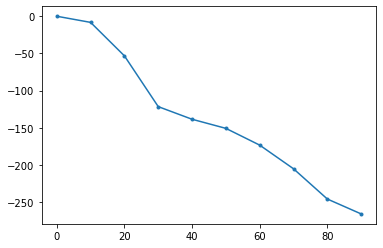

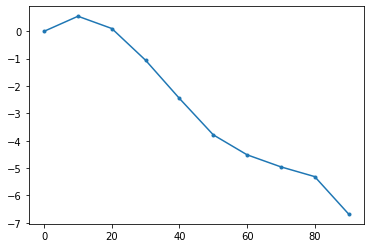

In [50]:
plt.plot(data_frac2, np.log(frac_compare_sly[:,0]*frac_compare_sly[:,1]), marker = '.')
plt.show()
plt.plot(data_frac2, np.log(frac_compare_sly[:,2]), marker = '.')
plt.show()

In [154]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
compare_mpa1 = []

mmax = max(mpa1_dm['Mg'][::48])
pos = list(mpa1_dm['Mg'][::48]).index(mmax)
radius = interp1d(mpa1_dm['Mg'][::48][:pos+1],mpa1_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations


gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state

like_01 = gw170817_like1 #*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
like_02 = gw170817_like2
like_03 = gw190425_like1*gw190425_like2
like_04 = gw190425_like2

compare_mpa1.append((j0030_like,j0740_like, gw170817_like1, gw170817_like2, gw190425_like1, gw190425_like2 ))

In [155]:
# from this, conclude that pulsar measurements favour mpa1 over sly by factor of 0.0123/0.0006 = 20, but gw measurements favor sly over mpa1 by factor of 0.0088/0.0024 = 4; can do the same calculation for zero vs non-zero DM fraction

In [156]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
# stable_m_r_mpa1_0 = np.genfromtxt('/content/stable_m_r_mpa1_0.csv',delimiter=',',names=True,dtype=None)

for i in range(9):

  radius = interp1d(stable_m_r_mpa1[i]['M'],stable_m_r_mpa1[i]['R'],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

  j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
  j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
  like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations
  

  gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
  gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
  gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
  gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
  like_01 = gw170817_like1 #*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
  like_02 = gw170817_like2
  like_03 = gw190425_like1
  like_04 = gw190425_like2
  compare_mpa1.append((j0030_like,j0740_like, gw170817_like1, gw170817_like2, gw190425_like1, gw190425_like2 ))
compare_mpa1 = np.array(compare_mpa1)

In [157]:
frac_compare_mpa1 = []

for i in range(10):
  frac_compare_mpa1.append(compare_mpa1[i]/compare_mpa1[0])
frac_compare_mpa1 = np.array(frac_compare_mpa1)


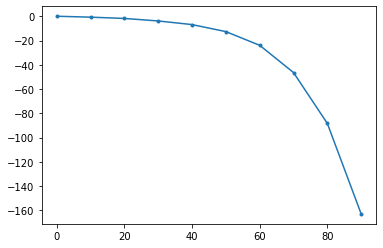

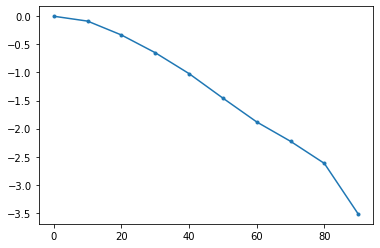

array([ 0.        , -0.08673733, -0.33377642, -0.64907706, -1.02139362,
       -1.45712177, -1.88116292, -2.22567114, -2.6189643 , -3.51832963])

In [184]:
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,0]), marker = '.')
plt.show()
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,5]), marker = '.')
plt.show()
np.log(frac_compare_mpa1[:,5])

In [25]:
compare_mpa1[0]/compare_sly[0]

array([20.49271164,  0.27384568])

In [159]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
compare_hqc18 = []

mmax = max(hqc18_dm['Mg'][::48])
pos = list(hqc18_dm['Mg'][::48]).index(mmax)
radius = interp1d(hqc18_dm['Mg'][::48][:pos+1],hqc18_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations


gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
like_02 = gw190425_like1*gw190425_like2

compare_hqc18.append((j0030_like,j0740_like, gw170817_like1, gw170817_like2, gw190425_like1, gw190425_like2 ))

In [160]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
# stable_m_r_hqc18_0 = np.genfromtxt('/content/stable_m_r_hqc18_0.csv',delimiter=',',names=True,dtype=None)

for i in range(9):

  radius = interp1d(stable_m_r_hqc18[i]['M'],stable_m_r_hqc18[i]['R'],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

  j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
  j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
  like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations
  

  gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
  gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
  gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
  gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
  like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
  like_02 = gw190425_like1*gw190425_like2

  compare_hqc18.append((j0030_like,j0740_like, gw170817_like1, gw170817_like2, gw190425_like1, gw190425_like2 ))
compare_hqc18 = np.array(compare_hqc18)

In [161]:
frac_compare_hqc18 = []

for i in range(10):
  frac_compare_hqc18.append(compare_hqc18[i]/compare_hqc18[0])
frac_compare_hqc18 = np.array(frac_compare_hqc18)

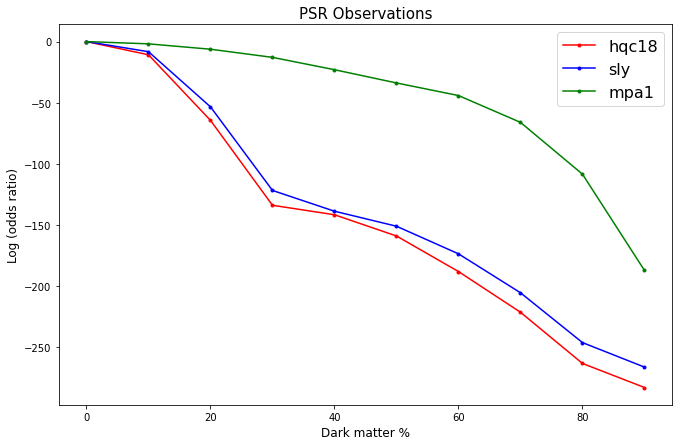

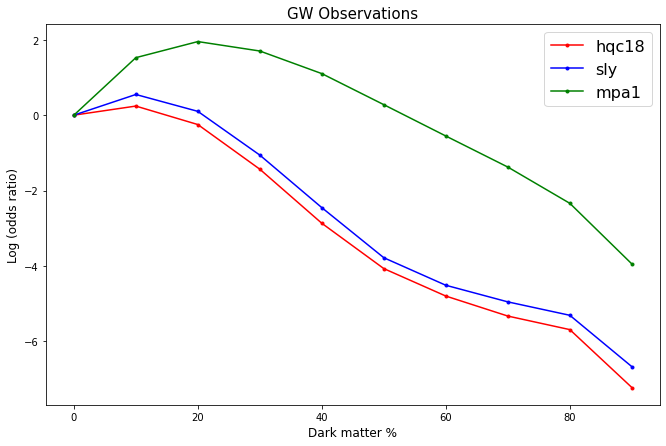

In [162]:
plt.figure(figsize= (11,7))
plt.plot(data_frac2,np.log(frac_compare_hqc18[:,0]*frac_compare_hqc18[:,1]), marker = '.', c = 'r', label = 'hqc18')
plt.plot(data_frac2, np.log(frac_compare_sly[:,0]*frac_compare_sly[:,1]), marker = '.', c = 'b', label = 'sly')
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,0]*frac_compare_mpa1[:,1]), marker = '.', c = 'g', label = 'mpa1')
plt.xlabel('Dark matter %', size = 12)
plt.title('PSR Observations', size = 15)
plt.ylabel('Log (odds ratio)', size  =12)
plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )


plt.show()

plt.figure(figsize= (11,7))
plt.plot(data_frac2,np.log(frac_compare_hqc18[:,2]*frac_compare_hqc18[:,3]), marker = '.', c = 'r',label = 'hqc18')
plt.plot(data_frac2, np.log(frac_compare_sly[:,2]*frac_compare_sly[:,3]), marker = '.', c= 'b', label = 'sly')
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,2]*frac_compare_mpa1[:,3]), marker = '.', c = 'g', label = 'mpa1')
plt.xlabel('Dark matter %', size = 12)
plt.ylabel('Log (odds ratio)', size  =12)
plt.title('GW Observations', size = 15)

plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )

plt.show()




In [60]:
frac_compare_sly_mpa1 = []
frac_compare_sly_hqc18 = []
for i in range(10):
  frac_compare_sly_mpa1.append(compare_mpa1[i]/compare_sly[i])
  frac_compare_sly_hqc18.append(compare_hqc18[i]/compare_sly[i])
frac_compare_sly_mpa1 = np.array(frac_compare_sly_mpa1)
frac_compare_sly_hqc18 = np.array(frac_compare_sly_hqc18)

In [61]:
(compare_mpa1/compare_sly)

array([[1.79432822e+00, 1.14208267e+01, 2.73845685e-01, 2.55230703e+00],
       [2.60311826e+00, 4.81540457e+03, 7.27747527e-01, 5.61437994e+00],
       [6.84670568e+00, 8.58473943e+20, 1.74555037e+00, 3.71998342e+01],
       [1.55993292e+01, 2.29382736e+47, 4.34067031e+00, 6.95307055e+02],
       [2.63267923e+02, 1.34696168e+49, 9.60663283e+00, 9.64081579e+03],
       [1.70103844e+05, 8.83643276e+46, 1.59220821e+01, 7.22697550e+04],
       [1.34145618e+10, 2.36118454e+47, 1.43886440e+01, 4.96653655e+04],
       [1.61102984e+14, 4.00141952e+47, 9.80413654e+00, 9.87881934e+03],
       [4.95799640e+13, 2.52341861e+47, 5.34727133e+00, 1.07215754e+03],
       [7.11472404e+16, 6.08451777e+18, 4.18476854e+00, 1.35378766e+01]])

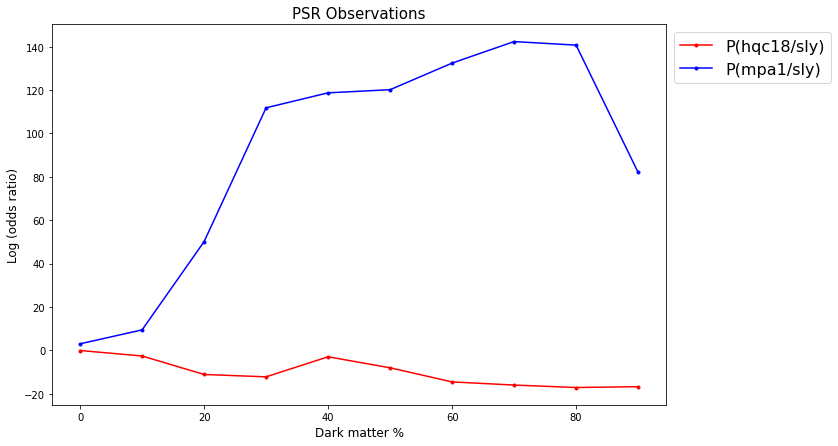

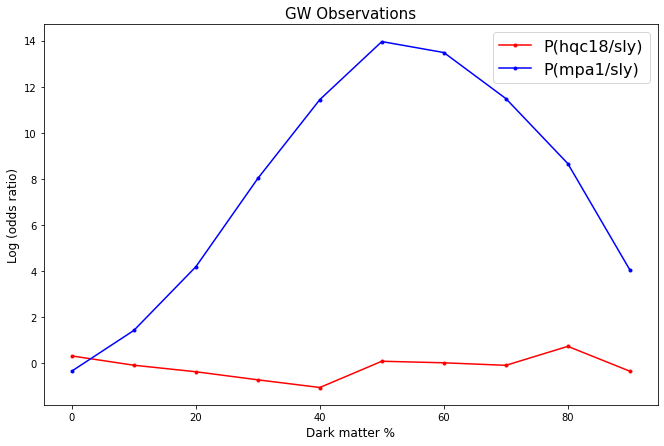

In [164]:
plt.figure(figsize= (11,7))
plt.plot(data_frac2,np.log(frac_compare_sly_hqc18[:,0]*frac_compare_sly_hqc18[:,1]), marker = '.', label = 'P(hqc18/sly)', c = 'r')
plt.plot(data_frac2,np.log(frac_compare_sly_mpa1[:,0]*frac_compare_sly_mpa1[:,1]), marker = '.', label = 'P(mpa1/sly)', c = 'b')
plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )
plt.xlabel('Dark matter %', size = 12)
plt.title('PSR Observations', size = 15)
plt.ylabel('Log (odds ratio)', size  =12)

plt.show()

plt.figure(figsize= (11,7))
plt.plot(data_frac2,np.log(frac_compare_sly_hqc18[:,2]*frac_compare_sly_hqc18[:,3]), marker = '.', label = 'P(hqc18/sly)', c = 'r')
plt.plot(data_frac2,np.log(frac_compare_sly_mpa1[:,2]*frac_compare_sly_mpa1[:,3]), marker = '.', label = 'P(mpa1/sly)', c = 'b')

plt.legend(bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )
plt.xlabel('Dark matter %', size = 12)
plt.title('GW Observations', size = 15)
plt.ylabel('Log (odds ratio)', size  =12)
plt.show()

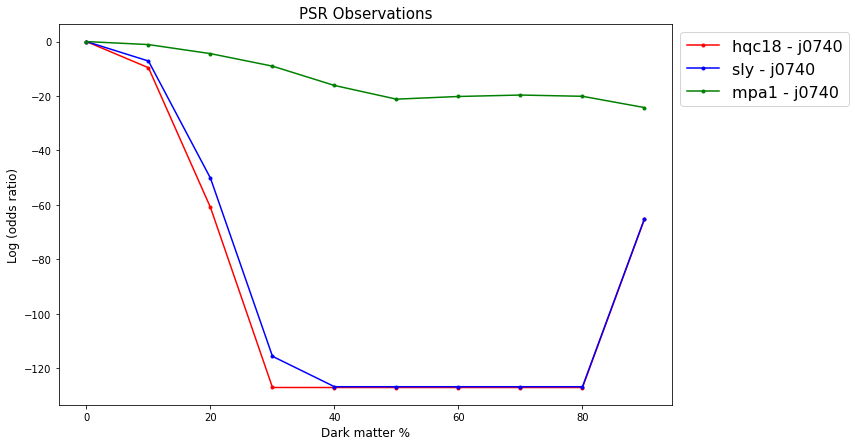

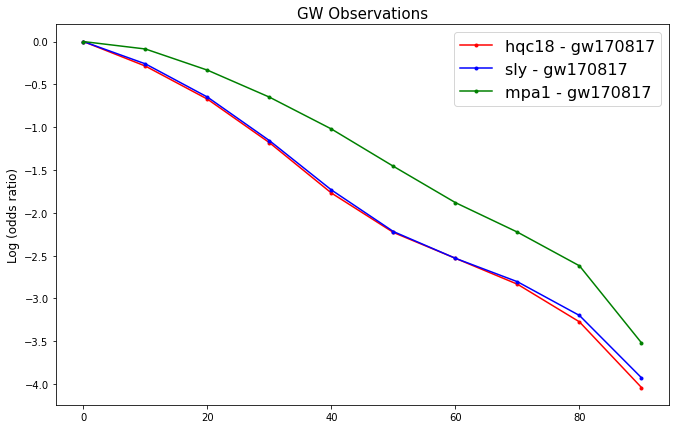

In [182]:
plt.figure(figsize= (11,7))
# plt.plot(data_frac2,np.log(frac_compare_hqc18[:,0]), marker = '.', c = 'r', label = 'hqc18 - J0030')
# plt.plot(data_frac2, np.log(frac_compare_sly[:,0]), marker = '.', c = 'b', label = 'sly - J0030')
# plt.plot(data_frac2,np.log(frac_compare_mpa1[:,0]), marker = '.', c = 'g', label = 'mpa1 - J0030')

plt.plot(data_frac2,np.log(frac_compare_hqc18[:,1]), marker = '.', c = 'r', label = 'hqc18 - j0740')
plt.plot(data_frac2, np.log(frac_compare_sly[:,1]), marker = '.', c = 'b', label = 'sly - j0740')
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,1]), marker = '.', c = 'g', label = 'mpa1 - j0740')

plt.xlabel('Dark matter %', size = 12)
plt.title('PSR Observations', size = 15)
plt.ylabel('Log (odds ratio)', size  =12)
plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )
# plt.xlim(0,40)

plt.show()

plt.figure(figsize= (11,7))
plt.plot(data_frac2,np.log(frac_compare_hqc18[:,5]), marker = '.', c = 'r',label = 'hqc18 - gw170817')
plt.plot(data_frac2, np.log(frac_compare_sly[:,5]), marker = '.', c= 'b', label = 'sly - gw170817')
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,5]), marker = '.', c = 'g', label = 'mpa1 - gw170817')

# plt.plot(data_frac2,np.log(frac_compare_hqc18[:,3]), marker = '.', c = 'r',label = 'hqc18 - gw190425')
# plt.plot(data_frac2, np.log(frac_compare_sly[:,3]), marker = '.', c= 'b', label = 'sly - gw190425')
# plt.plot(data_frac2,np.log(frac_compare_mpa1[:,3]), marker = '.', c = 'g', label = 'mpa1 - gw190425')

plt.ylabel('Log (odds ratio)', size  =12)
plt.title('GW Observations', size = 15)

plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )


plt.show()




In [196]:
# load inferred DM fractions
#all data based on mpa1 EOS
j0030_dm = 0. # most likely DM fraction for this observation
j0030_dm_ub = 0.1 # upper bound on DM fraction (marginally ruled out at e.g. log(odds ratio) = 3 level)
j0030_dm_lb = 0. # lower bound on DM fraction
j0030_err = max(j0030_dm_ub-j0030_dm,j0030_dm-j0030_dm_lb) # take largest error bar as Gaussian 1-sigma uncertainty about most likely DM fraction 

j0740_dm = 0.
j0740_dm_ub = 0.1
j0740_dm_lb = 0.
j0740_err = max(j0740_dm_ub-j0740_dm,j0740_dm-j0740_dm_lb)

gw170817m1_dm = 0.2
gw170817m1_dm_ub = 0.8
gw170817m1_dm_lb = 0.
gw170817m1_err = max(gw170817m1_dm_ub-gw170817m1_dm,gw170817m1_dm-gw170817m1_dm_lb)

gw170817m2_dm = 0.3
gw170817m2_dm_ub = 0.9
gw170817m2_dm_lb = 0.
gw170817m2_err = max(gw170817m2_dm_ub-gw170817m2_dm,gw170817m2_dm-gw170817m2_dm_lb)

gw190425m1_dm = 0.
gw190425m1_dm_ub = 0.3
gw190425m1_dm_lb = 0.
gw190425m1_err =  max(gw190425m1_dm_ub-gw190425m1_dm,gw190425m1_dm-gw190425m1_dm_lb)

gw190425m2_dm = 0.
gw190425m2_dm_ub = 0.8
gw190425m2_dm_lb = 0.
gw190425m2_err = max(gw190425m2_dm_ub-gw190425m2_dm,gw190425m2_dm-gw190425m2_dm_lb)


In [206]:
# load neutron star ages

j0030_age = 7.65 # in Gyr, from https://arxiv.org/abs/0904.4377

j0740_age = 3.75 # from https://arxiv.org/abs/1902.11150v1

gw170817_age = 0.4 # from https://arxiv.org/abs/1901.02732

gw190425_age = 0.1  # ?? not sure https://arxiv.org/pdf/2011.01495.pdf

age_fracerr = 0.5 # assume ages can be off by 50%, at the 1-sigma Gaussian uncertainty level

In [207]:
# linear fit for capture rate

wt_fit = np.polyfit([j0030_age,j0740_age,gw170817_age,gw170817_age, gw190425_age,gw190425_age],[j0030_dm,j0740_dm,gw170817m1_dm,gw170817m2_dm,gw190425m1_dm, gw190425m2_dm ],1,w=[1./j0030_err,1./j0740_err,1./gw170817m1_err,1./gw170817m2_err, 1./gw190425m1_err, 1./gw190425m2_err])

In [208]:
# to illustrate uncertainty in fit, sample from Gaussian distributions for neutron star DM fractions and ages and re-fit

num_samps = 1000

j0030_dms, j0030_ages, j0740_dms, j0740_ages, gw170817m1_dms, gw170817m2_dms, gw170817_ages, gw190425m1_dms, gw190425m2_dms, gw190425_ages  = [], [], [], [], [], [], [], [], [], []
for samp in range(num_samps):

  j0030_dm_samp = np.random.normal(j0030_dm,j0030_err) # sample DM fraction from Gaussian distribution
  j0030_age_samp = np.random.normal(j0030_age,j0030_age*age_fracerr) # sample age from Gaussian distribution

  j0740_dm_samp = np.random.normal(j0740_dm,j0740_err)
  j0740_age_samp = np.random.normal(j0740_age,j0740_age*age_fracerr)

  gw170817m1_dm_samp = np.random.normal(gw170817m1_dm,gw170817m1_err)
  gw170817m2_dm_samp = np.random.normal(gw170817m2_dm,gw170817m2_err)
  gw170817_age_samp = np.random.normal(gw170817_age,gw170817_age*age_fracerr)

  gw190425m1_dm_samp = np.random.normal(gw190425m1_dm,gw190425m1_err)
  gw190425m2_dm_samp = np.random.normal(gw190425m2_dm,gw190425m2_err)
  gw190425_age_samp = np.random.normal(gw190425_age,gw190425_age*age_fracerr)

  j0030_dms += [j0030_dm_samp]
  j0030_ages += [j0030_age_samp]
  j0740_dms += [j0740_dm_samp]
  j0740_ages += [j0740_age_samp]
  gw170817m1_dms += [gw170817m1_dm_samp]
  gw170817m2_dms += [gw170817m2_dm_samp]
  gw170817_ages += [gw170817_age_samp]
  gw190425m1_dms += [gw190425m1_dm_samp]
  gw190425m2_dms += [gw190425m2_dm_samp]
  gw190425_ages += [gw190425_age_samp]

fits = []
for samp in range(num_samps):

  xs = [j0030_ages[samp],j0740_ages[samp],gw170817_ages[samp],gw170817_ages[samp], gw190425_ages[samp], gw190425_ages[samp]]
  ys = [j0030_dms[samp],j0740_dms[samp],gw170817m1_dms[samp],gw170817m2_dms[samp],gw190425m1_dms[samp], gw190425m2_dms[samp]] 

  fit = np.polyfit(xs,ys,1)
  fits += [fit]

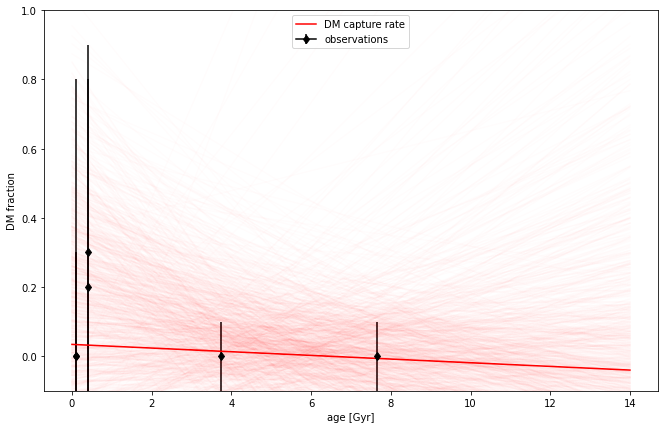

In [209]:
# plot inferred DM fractions and fit to capture rate
plt.figure(figsize= (11,7))
plt.errorbar(j0030_age,j0030_dm,yerr=j0030_err,marker='d',c='k',alpha=1) # DM fraction and age, with error bar in DM fraction (error in age not shown)
plt.errorbar(j0740_age,j0740_dm,yerr=j0740_err,marker='d',c='k',alpha=1)
plt.errorbar(gw170817_age,gw170817m1_dm,yerr=gw170817m1_err,marker='d',c='k',alpha=1)
plt.errorbar(gw170817_age,gw170817m2_dm,yerr=gw170817m2_err,marker='d',c='k',alpha=1,label='observations')
plt.errorbar(gw190425_age,gw190425m1_dm,yerr=gw190425m1_err,marker='d',c='k',alpha=1)
plt.errorbar(gw190425_age,gw190425m2_dm,yerr=gw190425m2_err,marker='d',c='k',alpha=1)

plt.plot(np.arange(0.,15.),wt_fit[0]*np.arange(0.,15.)+wt_fit[1],c='r',alpha=1,label='DM capture rate') # weighted linear fit for DM capture rate

for fit in fits:
  plt.plot(np.arange(0.,15.),fit[0]*np.arange(0.,15.)+fit[1],c='r',alpha=0.01) # range of possible fits, based on both DM fraction and age uncertainty

# plt.scatter(j0030_ages,j0030_dms,marker='.',c='k',alpha=0.1) # uncomment to see the data these possible fits are fitting
# plt.scatter(j0740_ages,j0740_dms,marker='.',c='k',alpha=0.1)
# plt.scatter(gw170817_ages,gw170817m1_dms,marker='.',c='k',alpha=0.1)
# plt.scatter(gw170817_ages,gw170817m2_dms,marker='.',c='k',alpha=0.1)

plt.ylim(-0.1,1)
# plt.xlim(0.,14.)
plt.xlabel('age [Gyr]')
plt.ylabel('DM fraction')

plt.legend()
plt.show()